In [1]:
#Thomson Sampling

In [2]:
#Thomson Sampling Algorithm
#Step1-At each round n, we consider two numbers for each ad i:-
#-number of times the ad i got reward 1 up to round n
#-number of times the ad i got reward 0 up to round n
#Step2-For each ad, we take a random draw from the distribution
#We select the ad that has highest theta(n)

In [3]:
#Thomson Sampling Vs UCB
#-UCB is deterministic (no randomness) and Thomson Sampling is probablistic
#-UCB requires update at every round and thomson sampling can accomodate delayed feedback
#-Thomson Sampling has better empirical evidence

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [20]:
#Implementing Thomson Sampling
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward


In [21]:
total_reward

2584

In [22]:
#thomson sampling has more number of total rewards

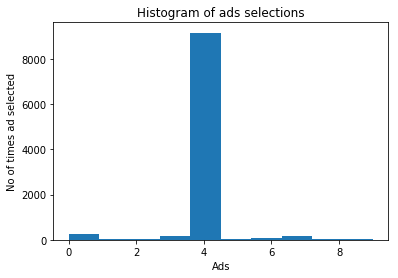

In [23]:
#Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('No of times ad selected')
plt.show()

In [ ]:
#5th ad is the best ad